### 5. Neural network - Fashion MNIST

##### 1.1  Random Samples

First the data is imported, normalized and labels are established for
a number of 16 samples which are plotted.

<Figure size 3600x3600 with 0 Axes>

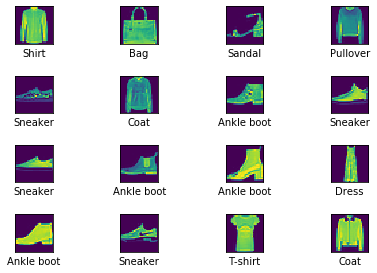

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing as pp

data_train = pd.read_csv(path.join('data/fashion-mnist_train.csv'))
data_test = pd.read_csv(path.join('data/fashion-mnist_test.csv'))

X_train, y_train = np.array(data_train.iloc[:, 1:]), np.array(data_train.iloc[:, 0])
X_test, y_test = np.array(data_test.iloc[:, 1:]), np.array(data_test.iloc[:, 0])

labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize data
scaler = pp.StandardScaler().fit(X_train)
Xn_train = scaler.transform(X_train)
Xn_test = scaler.transform(X_test)

plt.figure(figsize=(50, 50))
fig, ax = plt.subplots(nrows=4, ncols=4)
fig.tight_layout()
random = np.random.randint(60000, size=16)  # Get random samples for the training set

for idx in range(1, 17):
    ax = plt.subplot(4, 4, idx)
    ax.imshow(X_train[random[idx - 1], :].reshape(28, 28))  # Reshaping row to 28x28 image
    labelNr = y_train[random[idx - 1]]
    plt.xlabel(labels[labelNr])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

plt.show()

##### 1.2 Searching for parameters

A search is initiated to find the optimal parameters for the Neural Net.
I chose a few parameters to search from using different values
for neurons, layers etc. By using RandomizedSearch I can significantly speed up 
the parameter search albeit with slightly worse result.

In [3]:
parameters = {
    'hidden_layer_sizes': [[10], [10, 10], [100]],
    'activation': ['relu', 'tanh'],
    'early_stopping': [True, False],
    'alpha': [0.00001, 0.0001, 0.001, 0.1],
    'validation_fraction': [0.1]

}
grid_search = RandomizedSearchCV(MLPClassifier(verbose=True), cv=3, param_distributions=parameters, n_jobs=3)
grid_search.fit(Xn_train, y_train)
clf = grid_search.best_estimator_
print(grid_search.best_params_)

Iteration 1, loss = 0.49741064
Validation score: 0.857167
Iteration 2, loss = 0.35429728
Validation score: 0.861000
Iteration 3, loss = 0.31408313
Validation score: 0.867167
Iteration 4, loss = 0.28665159
Validation score: 0.870333
Iteration 5, loss = 0.26472456
Validation score: 0.872167
Iteration 6, loss = 0.24907047
Validation score: 0.867333
Iteration 7, loss = 0.23231029
Validation score: 0.879667
Iteration 8, loss = 0.21916054
Validation score: 0.875000
Iteration 9, loss = 0.20754766
Validation score: 0.876667
Iteration 10, loss = 0.19812446
Validation score: 0.880333
Iteration 11, loss = 0.18861301
Validation score: 0.882500
Iteration 12, loss = 0.17809744
Validation score: 0.881167
Iteration 13, loss = 0.17132282
Validation score: 0.886167
Iteration 14, loss = 0.16522686
Validation score: 0.884333
Iteration 15, loss = 0.15447339
Validation score: 0.883667
Iteration 16, loss = 0.14948806
Validation score: 0.884500
Iteration 17, loss = 0.14078031
Validation score: 0.882000
Iterat

##### 1.3 Using optimal parameters

After finding the optimal parameters from the previous search I then use 
the MLPClassifier to predict the test set and produce a confusion matrix and a classification report.

Optimal parameters: hidden_layer_sizes=[100], early_stopping=True, alpha=0.00001, activation='tanh'


##### 1.4 Confusion matrix

By plotting the confusion matrix we can study it and see that a few categories of clothing are often mistaken for each other such as Shirts which are often confused with T-shirts. Also Pullovers and Coats are often mistaken for each other. The results are also confirmed by the classification report which shows a 71% accuracy for Shirts and 83% accuracy for T-shirts.
There is also slightly lower accuracy for Pullovers and Coats.

In [6]:
clf = MLPClassifier(hidden_layer_sizes=[100], early_stopping=True, alpha=0.00001, activation='tanh', random_state=10)
clf.fit(Xn_train, y_train)

pred_test = clf.predict(Xn_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[850   0  12  18   3   1 108   0   8   0]
 [  2 982   2   9   1   1   2   0   1   0]
 [ 14   2 803  14  74   0  88   0   5   0]
 [ 22   7  14 908  25   1  21   0   2   0]
 [  1   0  84  28 813   0  72   0   2   0]
 [  1   0   0   1   0 941   0  38   5  14]
 [128   4  48  20  53   0 735   0  11   1]
 [  0   0   0   0   0  27   0 945   0  28]
 [ 10   0   7   2   3   4  11   1 960   2]
 [  0   0   0   0   0   7   0  46   1 946]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.80      0.82      1000
           3       0.91      0.91      0.91      1000
           4       0.84      0.81      0.82      1000
           5       0.96      0.94      0.95      1000
           6       0.71      0.73      0.72      1000
           7       0.92      0.94      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.95     